<a href="https://colab.research.google.com/github/Shimizu432-432/100-drill-exercises/blob/main/100%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第一章　webからの注文数を分析する１０本ノック

ライブラリのインポートと、ファイルの読み込み

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

customer_master=pd.read_csv('/content/drive/MyDrive/100knock-data_analytics/100knock-data_analytics/1章/customer_master.csv')
item_master=pd.read_csv('/content/drive/MyDrive/100knock-data_analytics/100knock-data_analytics/1章/item_master.csv')
transaction_1=pd.read_csv('/content/drive/MyDrive/100knock-data_analytics/100knock-data_analytics/1章/transaction_1.csv')
transaction_detail_1=pd.read_csv('/content/drive/MyDrive/100knock-data_analytics/100knock-data_analytics/1章/transaction_detail_1.csv')
transaction_2=pd.read_csv('/content/drive/MyDrive/100knock-data_analytics/100knock-data_analytics/1章/transaction_2.csv')
transaction_detail_2=pd.read_csv('/content/drive/MyDrive/100knock-data_analytics/100knock-data_analytics/1章/transaction_detail_2.csv')

データを結合

In [16]:
transaction=pd.concat([transaction_1,transaction_2],ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


本当に結合されているのか、dataの件数を見て確かめる

In [17]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


同様にtransaction_detailも結合してみる

In [18]:
transaction_detail=pd.concat([transaction_detail_1,transaction_detail_2],ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


次は横方向の結合をしてみる。
もっとも粒度の細かいデータを主軸において結合する

考えること

1.   足りないデータ列は何か？
2.   共通するデータ列は何か？
3.   二十計上になってしまうデータは付加してはいけない

In [19]:
join_data=pd.merge(transaction_detail_1,transaction[["transaction_id","payment_date","customer_id"]],on="transaction_id",how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


件数を見てみる

In [20]:
print(len(transaction_detail_1))
print(len(transaction))
print(len(join_data))

5000
6786
5000


In [21]:
join_data=pd.merge(join_data,customer_master,on="customer_id",how="left")
join_data=pd.merge(join_data,item_master,on="item_id",how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


quantityとitem_priceを計算し、priceを作る

In [22]:
join_data["price"]=join_data["quantity"]*join_data["item_price"]
join_data[["quantity","item_price","price"]].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


顧客からの信用を失わないために、結合するたびに件数の確認など怠らないこと。

次にdataの検算をしてみる。今回は簡易的に列の合計を比較する

In [23]:
print(join_data["price"].sum())
print(transaction["price"].sum())

675765000
971135000


本では一致するようだが、なぜか一致していないので確認をしてみる。

In [24]:
print(len(transaction))
print(len(transaction_detail))
print(len(transaction_detail_1))
print(len(transaction_detail_2))


6786
7144
5000
2144


売上データの結合を見ると、transaction_detailではなく、transaction_detail_1を主軸にしてしまっていたので、そこをかきかえました。

In [25]:
join_data=pd.merge(transaction_detail,transaction[["transaction_id","payment_date","customer_id"]],on="transaction_id",how="left")
print(len(transaction_detail))
print(len(transaction))
print(len(join_data))

7144
6786
7144


うまくいってそうなので、もう一度結合し、検算をしてみる。

In [26]:
join_data=pd.merge(join_data,customer_master,on="customer_id",how="left")
join_data=pd.merge(join_data,item_master,on="item_id",how="left")
join_data["price"]=join_data["quantity"]*join_data["item_price"]
join_data[["quantity","item_price","price"]].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


In [27]:
print(join_data["price"].sum())
print(transaction["price"].sum())

971135000
971135000


完全に一致しているので、検算終了

次は、統計量を把握しよう

まず知るべきもの

1.   欠損している値の状況
2.   全体の数時間



欠損値の数

In [28]:
join_data.isnull().sum()

,0
detail_id,0
transaction_id,0
item_id,0
quantity,0
payment_date,0
customer_id,0
customer_name,0
registration_date,0
customer_name_kana,0
email,0


各種統計量を出力

In [29]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


dataの期間範囲も見ておくべき

In [30]:
print(join_data["payment_date"].min())
print(join_data["payment_date"].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


2019年の2/1～7/31までのデータだとわかった

全体の数時間を把握した。次に時系列で状況を見てみる。

月別に売り上げを集計して一覧表示する。具体的には、payment_dateから年月の列を作成し、年月列単位でpriceを集計する。

そのためにまずデータ型を確認する

In [31]:
join_data.dtypes

,0
detail_id,int64
transaction_id,object
item_id,object
quantity,int64
payment_date,object
customer_id,object
customer_name,object
registration_date,object
customer_name_kana,object
email,object


payment_dataをdatetime型に変更し、年月列を作成

In [32]:
join_data["payment_date"]=pd.to_datetime(join_data["payment_date"])
join_data["payment_month"]=join_data["payment_date"].dt.strftime("%Y%m")
join_data[["payment_date","payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


strftimeを使い、文字列として年月を作成した。

In [33]:
join_data.groupby("payment_month")["price"].sum()

,price
payment_month,
201902,160185000
201903,160370000
201904,160510000
201905,155420000
201906,164030000
201907,170620000


本は.sum()["price"]と誤植してるので注意

月別、商品別に売り上げの合計値、数量をgroupbyで集計する

In [34]:
join_data.groupby(["payment_month","item_name"])[["price","quantity"]].sum()

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

表示を直観的に理解するためにpivot_tableを使う

In [35]:
pd.pivot_table(join_data,index='item_name',columns='payment_month',values=['price','quantity'],aggfunc='sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

最後に商品べつの売り上げ推移を可視化

In [36]:
graph_data=pd.pivot_table(join_data,index='payment_month',columns='item_name',values='price',aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

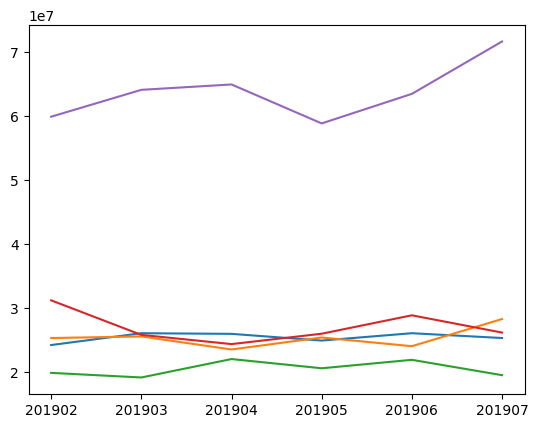

In [37]:
%matplotlib inline
plt.plot(list(graph_data.index),graph_data["PC-A"],label='PC-A')
plt.plot(list(graph_data.index),graph_data["PC-B"],label='PC-B')
plt.plot(list(graph_data.index),graph_data["PC-C"],label='PC-C')
plt.plot(list(graph_data.index),graph_data["PC-D"],label='PC-D')
plt.plot(list(graph_data.index),graph_data["PC-E"],label='PC-E')
plt.legend

#第２章　小売店のデータでデータ加工を行う１０本ノック


dataを読み込んでみる

In [38]:
import pandas as pd

uriage_data=pd.read_csv("/content/drive/MyDrive/100knock-data_analytics/100knock-data_analytics/2章/uriage.csv")
kokyaku_data=pd.read_excel("/content/drive/MyDrive/100knock-data_analytics/100knock-data_analytics/2章/kokyaku_daicho.xlsx")
import_data=pd.read_csv("/content/drive/MyDrive/100knock-data_analytics/100knock-data_analytics/2章/dump_data.csv")

それぞれ見てみる

In [39]:
uriage_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1,2019-07-13 13:05:29,商 品 S,NaN,浅田賢二
2,2019-05-11 19:42:07,商 品 a,NaN,南部慶二
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒
4,2019-04-22 03:09:35,商品a,NaN,平田鉄二


In [40]:
kokyaku_data.head()

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018/01/04
1,岡田 敏也,おかだ としや,E市,okada_toshiya@example.com,42782
2,芳賀 希,はが のぞみ,A市,haga_nozomi@example.com,2018/01/07
3,荻野 愛,おぎの あい,F市,ogino_ai@example.com,42872
4,栗田 憲一,くりた けんいち,E市,kurita_kenichi@example.com,43127


item_nameやitem_priceに欠損値があったり、表記の整合性がない。このようなデータが不整合を起こしている状態を、「データの揺れ」という。

データの揺れを見てみよう


In [41]:
uriage_data["item_name"].head()

,item_name
0,商品A
1,商 品 S
2,商 品 a
3,商品Z
4,商品a


このままでは、商品Aと商品aで違う商品だと判断されてしまう。同様に、

In [42]:
uriage_data["item_price"].head()

,item_price
0,100.0
1,NaN
2,NaN
3,2600.0
4,NaN


欠損値が確認される。この欠損値をどう埋めるかはすごく重要。

では、データに揺れがあるまま集計してみる。

In [43]:
uriage_data["purchase_date"]=pd.to_datetime(uriage_data["purchase_date"])
uriage_data["purchase_month"]=uriage_data["purchase_date"].dt.strftime("%Y%m")
res=uriage_data.pivot_table(index="purchase_month",columns="item_name",aggfunc="size",fill_value=0)
res

item_name,商品W,商 品 n,商品E,商品M,商品P,商品S,商品W,商品X,商 品O,商 品Q,...,商品k,商品l,商品o,商品p,商品r,商品s,商品t,商品v,商品x,商品y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0
201903,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
201905,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
201906,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
201907,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,2,0,0,0,0,0


In [44]:
res=uriage_data.pivot_table(index="purchase_month",columns="item_name",values="item_price",aggfunc="sum",fill_value=0)
res

item_name,商品W,商 品 n,商品E,商品M,商品P,商品S,商品W,商品X,商 品O,商 品Q,...,商品k,商品l,商品o,商品p,商品r,商品s,商品t,商品v,商品x,商品y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,0.0,1400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1100.0,1200.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2400.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1900.0,2000.0,2200.0,0.0,0.0
201903,0.0,0.0,500.0,1300.0,1600.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201904,2300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1700.0,...,0.0,0.0,0.0,0.0,0.0,1900.0,0.0,0.0,0.0,0.0
201905,0.0,0.0,0.0,0.0,0.0,1900.0,0.0,0.0,0.0,0.0,...,0.0,1200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500.0
201906,0.0,0.0,0.0,0.0,0.0,0.0,2300.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1600.0,0.0,0.0,0.0,0.0,2400.0,0.0
201907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1500.0,0.0,1800.0,0.0,0.0,0.0,0.0,0.0


本来は26個の商品が99個になってしまっている。これでは分析しても無駄になってしまうので、揺れを補正する必要がある。

商品名の揺れを補正してみる。

In [45]:
print(len(pd.unique(uriage_data["item_name"])))

99


In [46]:
uriage_data["item_name"]=uriage_data["item_name"].str.upper()
uriage_data["item_name"]=uriage_data["item_name"].str.replace("　","")
uriage_data["item_name"]=uriage_data["item_name"].str.replace(" ","")
uriage_data.sort_values(by=["item_name"],ascending=True)


,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,201906
1748,2019-05-19 20:22:22,商品A,100.0,松川綾女,201905
223,2019-06-25 08:13:20,商品A,100.0,板橋隆,201906
1742,2019-06-13 16:03:17,商品A,100.0,小平陽子,201906
1738,2019-02-10 00:28:43,商品A,100.0,松田浩正,201902
...,...,...,...,...,...
2880,2019-04-22 00:36:52,商品Y,NaN,田辺光洋,201904
2881,2019-04-30 14:21:09,商品Y,NaN,高原充則,201904
1525,2019-01-24 10:27:23,商品Y,2500.0,五十嵐春樹,201901
1361,2019-05-28 13:45:32,商品Y,2500.0,大崎ヒカル,201905


1行目のstr.upperで商品名の小文字を大文字に変換、2,3行目のstr.replace()で商品名の半角、全角スペースを除去している。正しく補正されたか確認してみる。

In [47]:
print(pd.unique(uriage_data["item_name"]))
print(len(pd.unique(uriage_data["item_name"])))

['商品A' '商品S' '商品Z' '商品V' '商品O' '商品U' '商品L' '商品C' '商品I' '商品R' '商品X' '商品G'
 '商品P' '商品Q' '商品Y' '商品N' '商品W' '商品E' '商品K' '商品B' '商品F' '商品D' '商品M' '商品H'
 '商品T' '商品J']
26


A～Zに統一され、件数も26件になっており、商品名におけるデータの揺れは解消されたことが分かる。

次に金額の欠損値の補完をする。今回は商品の単価は変動しないため、プログラムで欠損値を補完できる。

In [49]:
uriage_data.isnull().any(axis=0)

,0
purchase_date,False
item_name,False
item_price,True
customer_name,False
purchase_month,False


isnull関数を使うことで欠損値の有無を確認することができる。

In [51]:
flg_is_null=uriage_data["item_price"].isnull()
for trg in list(uriage_data.loc[flg_is_null,"item_name"].unique()):
  price=uriage_data.loc[(~flg_is_null)&(uriage_data["item_name"]==trg),"item_price"].max()
  uriage_data.loc[(flg_is_null)&(uriage_data["item_name"]==trg),"item_price"]=price
uriage_data.head()

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,201906
1,2019-07-13 13:05:29,商品S,1900.0,浅田賢二,201907
2,2019-05-11 19:42:07,商品A,100.0,南部慶二,201905
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒,201902
4,2019-04-22 03:09:35,商品A,100.0,平田鉄二,201904


1行目で欠損値のある場所の特定、2行目でループ処理の変数を指定している。まずlist()で変数の値をリスト形式に変更でき、そのなかの.locは条件に合致するデータを取り出すことができる。この場合は金額が欠損しているデータのitem_nameを取り出している。unique()は抽出した商品名を重複なく一意にし、無駄なループ処理をなくしている。続いて3行目のprice=...では、ループ変数の「欠損値がある商品名」を用いて、同じ商品で価格が正しく表示されている行を抽出し、その金額を取得している。~flg_is_nullの波線はは否定演算子といい、flg_is_null==Falseと同義。最後に4行目では、.locで欠損を起こしているデータを抽出し、先ほどの priceを代入している。以上の繰り返し処理により、金額欠損値が保管されている。一応検証をする。

In [53]:
uriage_data.isnull().any(axis=0)

,0
purchase_date,False
item_name,False
item_price,False
customer_name,False
purchase_month,False


欠損がなくなったことが確認できる。各商品金額が正しく保管されたか確認する。

In [56]:
for trg in list(uriage_data["item_name"].sort_values().unique()):
  print(trg+"の最大額："+str(uriage_data.loc[uriage_data["item_name"]==trg]["item_price"].max())+"の最少額"+str(uriage_data.loc[uriage_data["item_name"]==trg]["item_price"].min(skipna=False)))

商品Aの最大額：100.0の最少額100.0
商品Bの最大額：200.0の最少額200.0
商品Cの最大額：300.0の最少額300.0
商品Dの最大額：400.0の最少額400.0
商品Eの最大額：500.0の最少額500.0
商品Fの最大額：600.0の最少額600.0
商品Gの最大額：700.0の最少額700.0
商品Hの最大額：800.0の最少額800.0
商品Iの最大額：900.0の最少額900.0
商品Jの最大額：1000.0の最少額1000.0
商品Kの最大額：1100.0の最少額1100.0
商品Lの最大額：1200.0の最少額1200.0
商品Mの最大額：1300.0の最少額1300.0
商品Nの最大額：1400.0の最少額1400.0
商品Oの最大額：1500.0の最少額1500.0
商品Pの最大額：1600.0の最少額1600.0
商品Qの最大額：1700.0の最少額1700.0
商品Rの最大額：1800.0の最少額1800.0
商品Sの最大額：1900.0の最少額1900.0
商品Tの最大額：2000.0の最少額2000.0
商品Uの最大額：2100.0の最少額2100.0
商品Vの最大額：2200.0の最少額2200.0
商品Wの最大額：2300.0の最少額2300.0
商品Xの最大額：2400.0の最少額2400.0
商品Yの最大額：2500.0の最少額2500.0
商品Zの最大額：2600.0の最少額2600.0


最大値と最小値が一致しているので金額の補完ができていると分かる。一致しているかもプログラムに組み込んでおくと便利そうなのでやってみる

In [67]:
for trg in list(uriage_data["item_name"].sort_values().unique()):
  trg_max=uriage_data.loc[uriage_data["item_name"]==trg]["item_price"].max()
  trg_min=uriage_data.loc[uriage_data["item_name"]==trg]["item_price"].min(skipna=False)
  if trg_max==trg_min:
    print(trg+"の最大額："+str(uriage_data.loc[uriage_data["item_name"]==trg]["item_price"].max())+"の最少額"+str(uriage_data.loc[uriage_data["item_name"]==trg]["item_price"].min(skipna=False))+'    '+'一致')
  else:
    print(trg+'  error')

商品Aの最大額：100.0の最少額100.0    一致
商品Bの最大額：200.0の最少額200.0    一致
商品Cの最大額：300.0の最少額300.0    一致
商品Dの最大額：400.0の最少額400.0    一致
商品Eの最大額：500.0の最少額500.0    一致
商品Fの最大額：600.0の最少額600.0    一致
商品Gの最大額：700.0の最少額700.0    一致
商品Hの最大額：800.0の最少額800.0    一致
商品Iの最大額：900.0の最少額900.0    一致
商品Jの最大額：1000.0の最少額1000.0    一致
商品Kの最大額：1100.0の最少額1100.0    一致
商品Lの最大額：1200.0の最少額1200.0    一致
商品Mの最大額：1300.0の最少額1300.0    一致
商品Nの最大額：1400.0の最少額1400.0    一致
商品Oの最大額：1500.0の最少額1500.0    一致
商品Pの最大額：1600.0の最少額1600.0    一致
商品Qの最大額：1700.0の最少額1700.0    一致
商品Rの最大額：1800.0の最少額1800.0    一致
商品Sの最大額：1900.0の最少額1900.0    一致
商品Tの最大額：2000.0の最少額2000.0    一致
商品Uの最大額：2100.0の最少額2100.0    一致
商品Vの最大額：2200.0の最少額2200.0    一致
商品Wの最大額：2300.0の最少額2300.0    一致
商品Xの最大額：2400.0の最少額2400.0    一致
商品Yの最大額：2500.0の最少額2500.0    一致
商品Zの最大額：2600.0の最少額2600.0    一致
